# 《神经网络与深度学习》学习笔记
## 第4章 前馈神经网络

### 4.1 神经元
* 净输入：$ z = \mathbf{w}^{\mathrm{T}}\mathbf{x} + b$
* 激活函数：$f(*)$
  * 连续可导(允许少数点上不可导)的非线性函数。
  * 尽可能简单以提高计算效率。
  * 激活函数的导函数的值域需要在一个合适的区间内。
* 活性值：$a = f\left(z\right)$

#### 4.1.1 Sigmoid型激活函数
* Sigmoid型激活函数指的是一类S型曲线函数。
* Logistic函数：$\sigma(x)=\frac{1}{1+\exp (-x)}$
* Tanh函数：$\mathrm{tanh}\left(x\right)=\frac{\exp\left(x\right)-\exp\left(-x\right)}{\exp\left(x\right)+\exp\left(-x\right)}$
* $\mathrm{tanh}\left(x\right)=2\sigma(2x)-1$
* Hard-Logistic和Hard-Tanh函数：在一定区域内用一阶泰勒占来代替。

#### 4.1.2 修正单元
* $\mathrm{ReLU}(x) = \max(0, x)$
* $\mathrm{LeakyReLU}(x) = \max(x, \gamma x)$
* $\mathrm{PReLU}(x) = \max(0, x) + \gamma_{i}\min(0,x)$
* $\mathrm{ELU}(x) = \max(0, x) + \min\left(0, \gamma\left(\exp\left(x\right)-1\right)\right)$
* $\mathrm{Softplus}(x) = \log(1 + \exp(x))$

#### 4.1.3 Swish函数
* $\mathrm{swish}(x)=x\sigma(\beta x)$
* $\beta$为可学习的超参数，当$\sigma(\beta x)$接近1时，激活函数值接近$x$，当$\sigma(\beta x)$接近0时，激活函数的输出近似于0。

#### 4.1.4 高斯误差线性单元
* 利用正态分布的累计分布函数。

#### 4.1.5 Maxout单元
* $\mathrm{maxout}(x) = \max_{k\in[1,K]}(z_{k})$

### 4.2 网络结构
* 前馈网络、记忆网络、图网络

### 4.3 前馈神经网络
* 组成：输入层、隐藏层、输出层
* $\mathbf{z}^{(l)} = W^{(l)}\cdot\mathbf{a}^{(l-1)}+\mathbf{b}^{(l)}$
* $\mathbf{a}^{(l)}=f_l(\mathbf{z}^{(l)})$

#### 4.3.1 通用近似定理
* 常见的连续非线性函数都可以用前馈神经网络来近似。

#### 4.3.2 应用到机器学习
* 最后一层设置$C$个神经元，其激活函数为softmax函数，输出的值可以作为每个类的后验概率。

#### 4.3.3 参数学习
* 使用交叉熵损失函数，来迭代更新参数。
* 对每个参数进行求偏导比较低效，一般使用反向传播算法。

### 4.4 反向传播算法
* 前馈计算每一层的净输入$\mathbf{z}^{(l)}$和激活值$\mathbf{a}^{(l)}$，直到最后一层；
* 反向传播计算每一层的误差项$\delta^{(l)}$；
* 计算每一层参数的偏导数，并更新参数。

### 4.5 自动梯度计算
* 数值微分：利用数值方法来计算函数的导数。
* 符号微分：基于符号计算的自动求导方法。
* 自动微分：符号微分的程序。

### 4.6 优化问题
* 非凸优化问题
* 梯度小时问题

In [1]:
# 前馈神经网络Pytorch实现
# 代码参考自： https://github.com/L1aoXingyu/pytorch-beginner，有部分修改

import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

batch_size = 64
learning_rate = 1e-2
num_epochs = 20
use_gpu = torch.cuda.is_available()

# 下载训练集 MNIST 手写数字训练集
train_dataset = datasets.MNIST(
    root='./datasets', train=True,
    transform=transforms.ToTensor(), download=True)

test_dataset = datasets.MNIST(
    root='./datasets', train=False,
    transform=transforms.ToTensor())

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


In [2]:
# 定义简单的前馈神经网络
class NeuralNetwork(nn.Module):
    def __init__(self, in_dim, n_hidden_1, n_hidden_2, out_dim):
        super(NeuralNetwork, self).__init__()
        # 这是一个简单的前馈神经网络，有四层神经元组成，四层神经元中间共有三个连接。
        # 其中第一、二个连接是ReLU作为激活函数，这样子可以避免梯度消失。
        # 第三个连接用Softmax作为激活函数，这样子可以是输出的值代表每一个标签的概率。
        self.layer1 = nn.Sequential(
            nn.Linear(in_dim, n_hidden_1),
            nn.ReLU(True))
        self.layer2 = nn.Sequential(
            nn.Linear(n_hidden_1, n_hidden_2),
            nn.ReLU(True))
        self.layer3 = nn.Sequential(
            nn.Linear(n_hidden_2, out_dim),
            nn.LogSoftmax())

    def forward(self, x):
        output = self.layer3(self.layer2(self.layer1(x)))
        return output


In [3]:
# 模型及优化器构造
model = NeuralNetwork(28 * 28, 20, 20, 10).cuda if use_gpu else NeuralNetwork(28 * 28, 20, 20, 10)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)


**********
epoch 1
C:\Users\TZX\Anaconda2\envs\py3\lib\site-packages\torch\nn\modules\container.py:100: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)
Train Loss: 1.877067, Acc: 0.363006
Test Loss: 1.110461, Acc: 0.643909

**********
epoch 2
Train Loss: 0.745441, Acc: 0.784615
Test Loss: 0.524696, Acc: 0.854498

**********
epoch 3
Train Loss: 0.468855, Acc: 0.868237
Test Loss: 0.405696, Acc: 0.882265

**********
epoch 4
Train Loss: 0.398897, Acc: 0.887293
Test Loss: 0.364298, Acc: 0.895502

**********
epoch 5
Train Loss: 0.362918, Acc: 0.896505
Test Loss: 0.338578, Acc: 0.901771

**********
epoch 6
Train Loss: 0.338056, Acc: 0.904134
Test Loss: 0.313816, Acc: 0.908440

**********
epoch 7
Train Loss: 0.316983, Acc: 0.910298
Test Loss: 0.295217, Acc: 0.914510

**********
epoch 8
Train Loss: 0.299531, Acc: 0.915528
Test Loss: 0.280522, Acc: 0.920581

**********
epoch 9
Train Loss: 0.28432

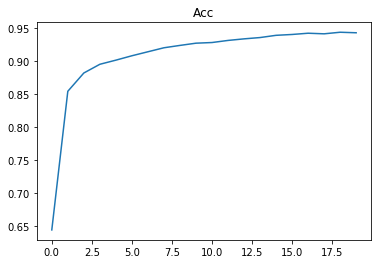

In [4]:
# 训练过程
acc = []

for epoch in range(num_epochs):
    print('*' * 10)
    print(f'epoch {epoch+1}')
    running_loss, running_acc = .0, .0
    for i, data in enumerate(train_loader, 1):
        img, label = data
        img = img.view(img.size(0), -1)
        if use_gpu:
            img = img.cuda()
            label = label.cuda()
        # 向前传播
        out = model(img)
        loss = criterion(out, label)
        running_loss += loss.item()
        _, pred = torch.max(out, 1)
        running_acc += (pred == label).float().mean()
        # 向后传播
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # if i % 300 == 0:
        #     print(f'[{epoch+1}/{num_epochs}] Loss: {running_loss/i:.6f}, Acc: {running_acc/i:.6f}')
    print(f'Train Loss: {running_loss/i:.6f}, Acc: {running_acc/i:.6f}')
    model.eval()
    eval_loss, eval_acc = .0, .0
    for data in test_loader:
        img, label = data
        img = img.view(img.size(0), -1)
        if use_gpu:
            img = img.cuda()
            label = label.cuda()
        with torch.no_grad():
            out = model(img)
            loss = criterion(out, label)
        eval_loss += loss.item()
        _, pred = torch.max(out, 1)
        eval_acc += (pred == label).float().mean()
    acc.append(eval_acc/len(test_loader))
    print(f'Test Loss: {eval_loss/len(test_loader):.6f}, Acc: {eval_acc/len(test_loader):.6f}\n')

plt.figure()
plt.title('Acc')
plt.plot(range(num_epochs), acc)
plt.show()
# 保存模型
torch.save(model.state_dict(), './neural_network.pth')

C:\Users\TZX\Anaconda2\envs\py3\lib\site-packages\torch\nn\modules\container.py:100: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


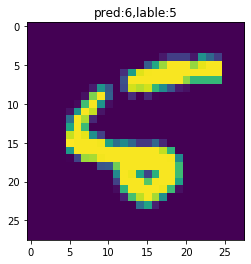

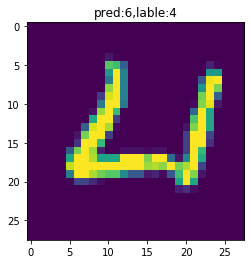

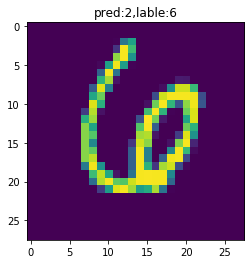

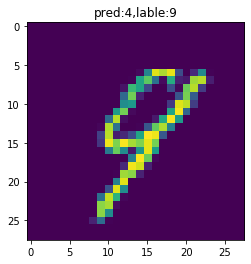

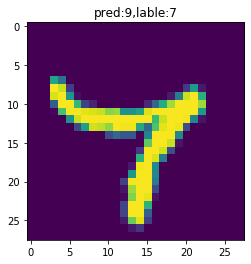

In [5]:
# 输出数据可视化
from PIL import Image

sample_n = 5
n = 0

for data in test_loader:
    img, label = data
    images = (img*256).int()
    img = img.view(img.size(0), -1)
    if use_gpu:
        img = img.cuda()
        label = label.cuda()
    with torch.no_grad():
        out = model(img)
    _, pred = torch.max(out, 1)
    for i in range(len(pred)):
        if pred[i] != label[i]:
            plt.figure()
            plt.title('pred:{},lable:{}'.format(int(pred[i]), int(label[i])))
            plt.imshow(images[i][0])
            n += 1
        if(n >= sample_n):
            break
    if(n >= sample_n):
        break

### 实验结果分析
* 从准确率上升的图表可以看出准确率到达0.91之后爬坡缓慢。
* 从几张预测错误的图片可视化可以看出预测错误的图片大部分质量不高，人为辨别也比较困难。